# **CV2023 Assignment 3**
## Team Members:
Ishan Singh, MDS202118 - 34%  
Kumar Priyank, MDS202122 - 33%    
Sucheta Jhunjhunwala, MDS202151 - 33%

## Dataset:
### Checkerboard: https://drive.google.com/file/d/1PuOmxS-7_p5Y5VR7uYK-OR_1bXw0YqqY/view?usp=sharing

### Dotsgrid: https://drive.google.com/file/d/15Padh--9Ly4GaUwvHqOGF9zieORKSLCV/view?usp=sharing

In [19]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import cv2

### **Checkerboard Pattern**

### Extracting the file and drawing the pattern

In [20]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.


In [21]:
#extract the images
from zipfile import ZipFile
with ZipFile('checkerboard_images.zip','r') as z:
    z.extractall('checkerboard_images/')

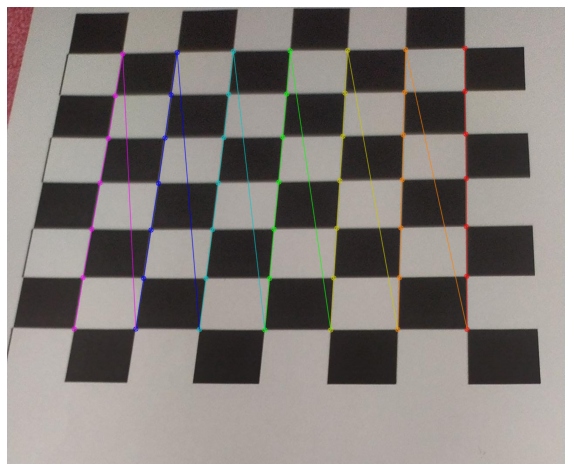

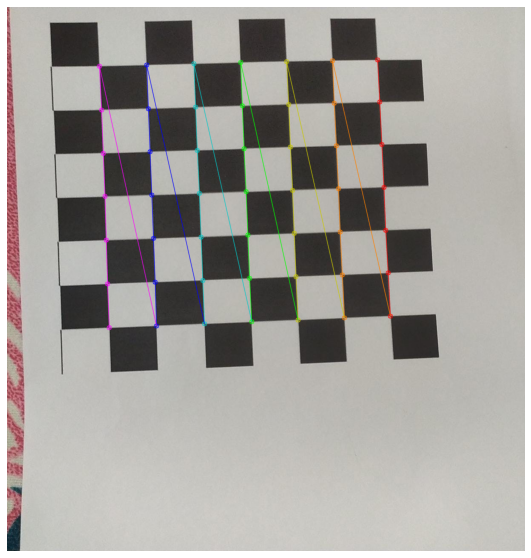

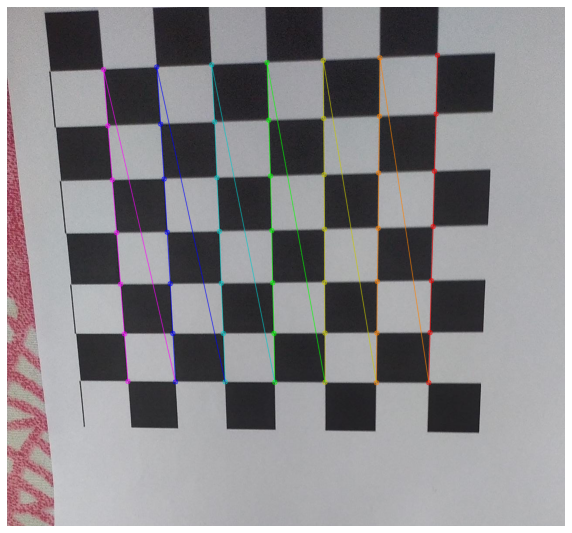

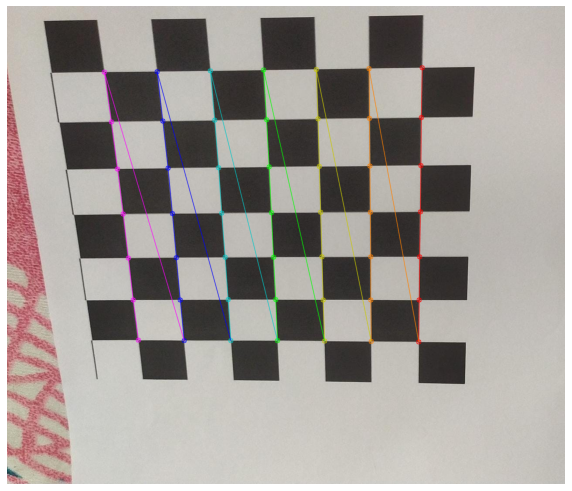

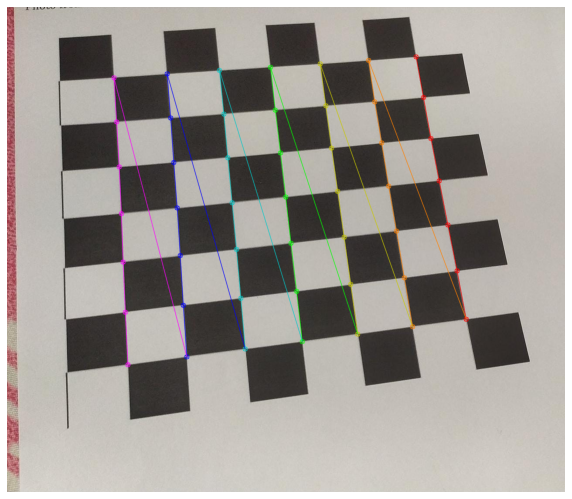

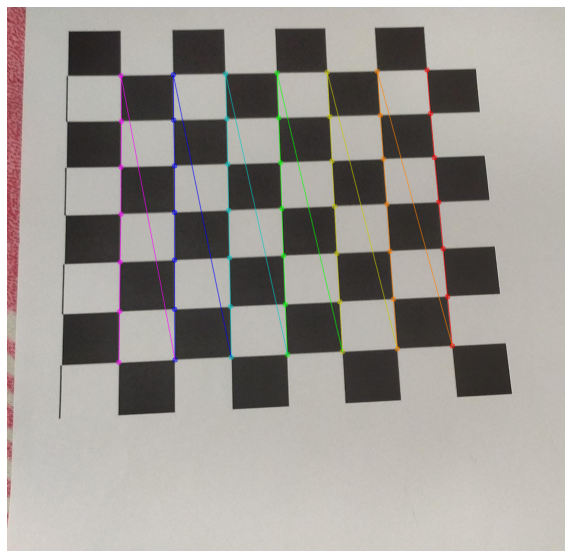

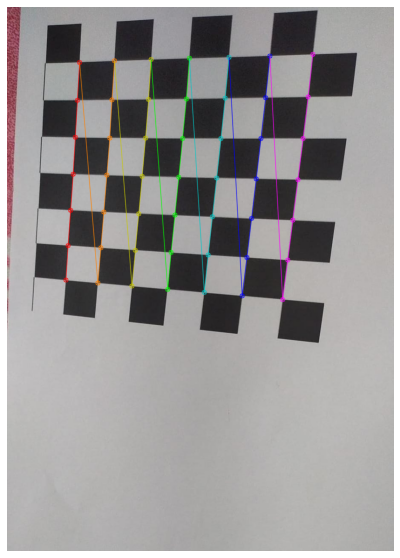

In [22]:
images = glob.glob('checkerboard_images/*.jpeg') #list of images
for i in images:
    img = cv2.imread(i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,7), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (7,7), corners2, ret)
        plt.figure(figsize=(10, 10))
        plt.axis("off")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()


### Camera Calibration


In [23]:
#returns the camera matrix, distortion coefficients, rotation and translation vectors
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

np.set_printoptions(precision=4, suppress=True)

print('Intrinsic Camera Matrix: \n', mtx)
k1,k2,p1,p2,k3 = dist[0][0],dist[0][1],dist[0][2],dist[0][3],dist[0][4]  #get the distortion coefficients
print("The radial distortion coefficients: %.4f and %.f" %(k1,k2))

Intrinsic Camera Matrix: 
 [[2883.9347    0.      274.2701]
 [   0.     2769.9142  503.3647]
 [   0.        0.        1.    ]]
The radial distortion coefficients: 0.6883 and -24


### Reprojection error

In [24]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist) #transform the object point to image point
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2) #absolute norm betweenthe transformation and the corners
    mean_error += error
print( "Reprojection error: {}".format(mean_error/len(objpoints)) )

Reprojection error: 0.5824641626461288


## **Dot Grid Pattern**

In [25]:
import re
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
import requests
import zipfile
import io
import os

### Reading the images and finding the pattern

In [26]:
#extract the images
from zipfile import ZipFile
with ZipFile('dotsgrid.zip','r') as z:
    z.extractall()

In [27]:
# Create a SimpleBlobDetector object
detector_params = cv2.SimpleBlobDetector_Params()

# Adjust detector parameters
detector_params.minThreshold = 8
detector_params.maxThreshold = 255
detector_params.filterByArea = True
detector_params.minArea = 30
detector_params.maxArea = 2500
detector_params.filterByCircularity = True
detector_params.minCircularity = 0.1
detector_params.filterByConvexity = True
detector_params.minConvexity = 0.87
detector_params.filterByInertia = True
detector_params.minInertiaRatio = 0.01
detector_params.minDistBetweenBlobs = 2

# Create the blob detector using the modified parameters
blob_detector = cv2.SimpleBlobDetector_create(detector_params)

# Prepare the object points
# The distance between the centers of the blobs is 2.2cm
obj_points = np.zeros((10*10, 3), np.float32)
obj_points[:, :2] = np.mgrid[0:10, 0:10].T.reshape(-1, 2)

# Print the object points to the console
print("Object Points: ")
print(obj_points)

Object Points: 
[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [7. 0. 0.]
 [8. 0. 0.]
 [9. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [7. 1. 0.]
 [8. 1. 0.]
 [9. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [7. 2. 0.]
 [8. 2. 0.]
 [9. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2. 3. 0.]
 [3. 3. 0.]
 [4. 3. 0.]
 [5. 3. 0.]
 [6. 3. 0.]
 [7. 3. 0.]
 [8. 3. 0.]
 [9. 3. 0.]
 [0. 4. 0.]
 [1. 4. 0.]
 [2. 4. 0.]
 [3. 4. 0.]
 [4. 4. 0.]
 [5. 4. 0.]
 [6. 4. 0.]
 [7. 4. 0.]
 [8. 4. 0.]
 [9. 4. 0.]
 [0. 5. 0.]
 [1. 5. 0.]
 [2. 5. 0.]
 [3. 5. 0.]
 [4. 5. 0.]
 [5. 5. 0.]
 [6. 5. 0.]
 [7. 5. 0.]
 [8. 5. 0.]
 [9. 5. 0.]
 [0. 6. 0.]
 [1. 6. 0.]
 [2. 6. 0.]
 [3. 6. 0.]
 [4. 6. 0.]
 [5. 6. 0.]
 [6. 6. 0.]
 [7. 6. 0.]
 [8. 6. 0.]
 [9. 6. 0.]
 [0. 7. 0.]
 [1. 7. 0.]
 [2. 7. 0.]
 [3. 7. 0.]
 [4. 7. 0.]
 [5. 7. 0.]
 [6. 7. 0.]
 [7. 7. 0.]
 [8. 7. 0.]
 [9. 7. 0.]
 [0. 8. 0.]
 [1. 8. 0.]


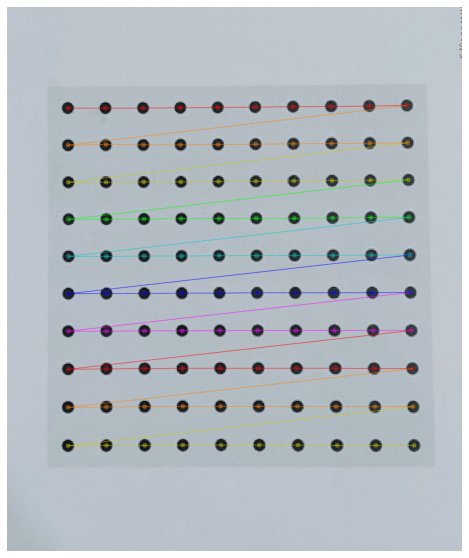

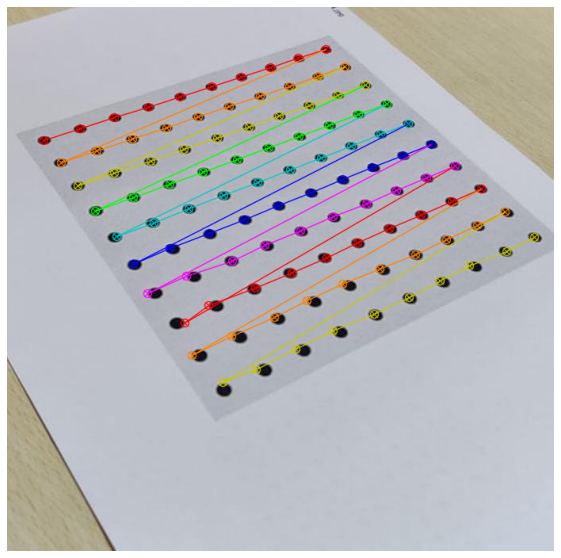

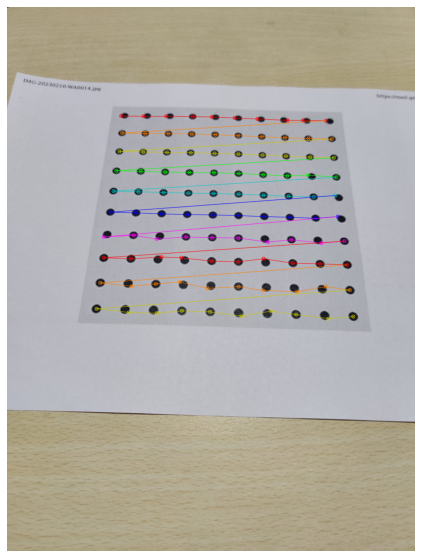

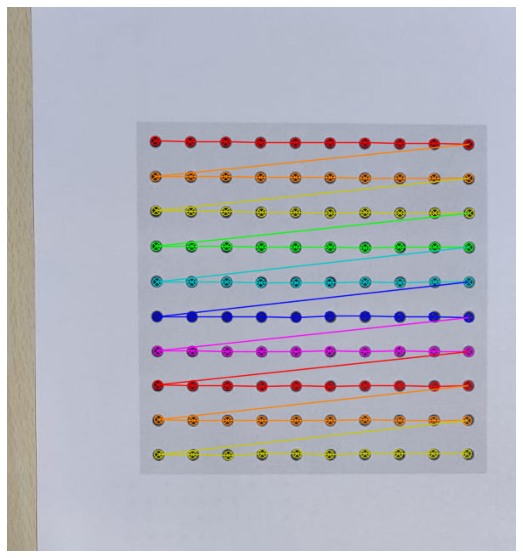

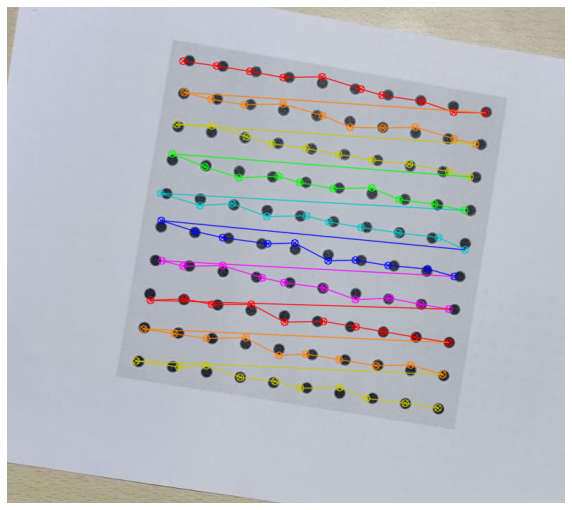

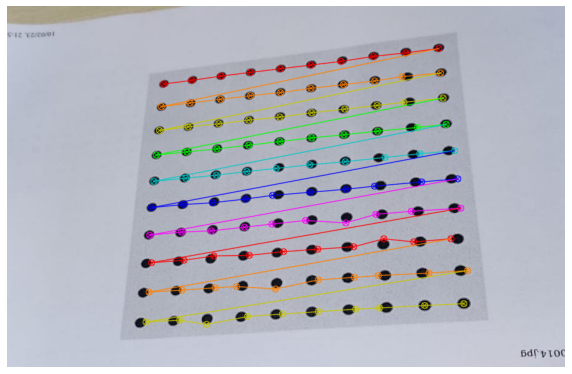

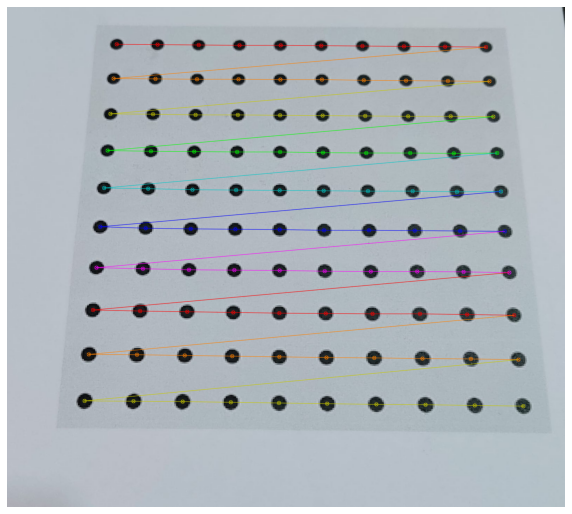

Number of images retained during blob detection:  7


In [28]:
# Create arrays to store object points and image points from all images
objpoints = [] #In 3D (Real World)
imgpoints = [] #In 2D (Image Plane)

# Read images
images = glob.glob('dotsgrid/*.jpeg')

# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Counter for images where corners were detected
found = 0

# Loop through each image
for i, fname in enumerate(images):
    # Load image and convert to grayscale
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect blobs
    keypoints = blob_detector.detect(img)

    # Draw detected blobs as red circles
    im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    im_with_keypoints_gray = cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2GRAY)

    # Find the circles grid corners
    ret, corners = cv2.findCirclesGrid(im_with_keypoints_gray, (10,10), None, blobDetector=blob_detector)

    # If found, add object points, image points (after refining them)
    if ret:
        objpoints.append(obj_points)
        corners2 = cv2.cornerSubPix(im_with_keypoints_gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (10,10), corners2, ret)
        plt.figure(figsize=(10, 10))
        plt.axis("off")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()

        found += 1

print('Number of images retained during blob detection: ',found)

### Camera Calibration

In [29]:
# Perform camera calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, im_with_keypoints_gray.shape[::-1], None, None)

# Round the matrix and distortion coefficients
np.set_printoptions(precision=4, suppress=True)

# Display the camera matrix and distortion parameters
print("Intrinsic Camera Matrix:")
print(mtx)
print("\nLens Distortion Parameters:")
print(dist)

Intrinsic Camera Matrix:
[[40578.8827     0.       576.5267]
 [    0.     23580.6973   678.4884]
 [    0.         0.         1.    ]]

Lens Distortion Parameters:
[[  -48.8676  3739.371      0.9943     0.0415 -3016.5056]]


### Reprojection Error

In [30]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist) #transform the object point to image point
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2) #absolute norm betweenthe transformation and the corners
    mean_error += error
print( "Reprojection error: {}".format(mean_error/len(objpoints)) )

Reprojection error: 0.9557557062448657


### Retrieving the undistorted image

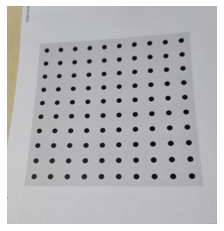

In [31]:
# Undistorted Image
img = cv2.imread(images[0])
h, w = img.shape[:2]

new_mtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))

# undistort
undist_img = cv2.undistort(img, mtx, dist, None, new_mtx)

# crop the image
x, y, crop_w, crop_h = roi
undist_img = undist_img[y:y+crop_h, x:x+crop_w]

plt.axis('off')
plt.imshow(cv2.cvtColor(undist_img, cv2.COLOR_BGR2RGB));